## 8. Building A Scikit Learn Classification Pipeline

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2021.10.18 </div>
<div style="text-align: right\"> Last update: 2021.10.18</div>

- 출처 : https://www.kaggle.com/gautham11/building-a-scikit-learn-classification-pipeline

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

from scipy.signal import find_peaks

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

In [9]:
data = pd.read_csv('data/Iris.csv')

In [10]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.shape

(150, 6)

In [12]:
data = data.drop('Id', axis = 1)

In [13]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

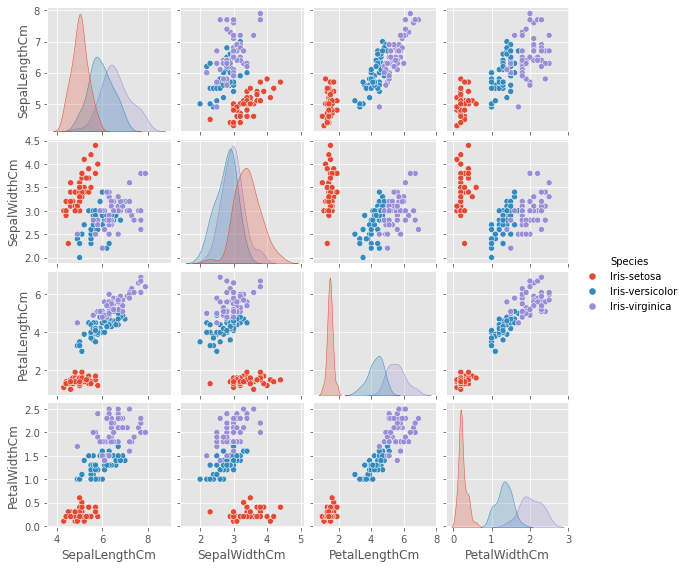

In [15]:
sns.pairplot(data, hue = 'Species', size = 2)

### Building the Pipeline

먼저 타겟 변수를 인코딩한다.  
파이프라인은 두단계를 거친다.  
- 피처 정규화  
- 분류기 구동 여기서는 KNN

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
data['Species'] = LabelEncoder().fit_transform(data['Species'])

In [19]:
data['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [20]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), # step1 : normalize data
    ('clf', LogisticRegression()) # step2 : classifier
])

In [21]:
pipeline

Pipeline(steps=[('normalizer', StandardScaler()),
                ('clf', LogisticRegression())])

In [22]:
pipeline.steps

[('normalizer', StandardScaler()), ('clf', LogisticRegression())]

In [23]:
#Seperate train and test data
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1].values,
                                                   data['Species'],
                                                   test_size = 0.4,
                                                   random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


### LR 분류기

In [24]:
from sklearn.model_selection import cross_validate

In [25]:
scores = cross_validate(pipeline, X_train, y_train)

In [26]:
scores

{'fit_time': array([0.01196718, 0.004987  , 0.00498629, 0.00498652, 0.00498652]),
 'score_time': array([0.        , 0.        , 0.00099707, 0.        , 0.        ]),
 'test_score': array([0.94444444, 1.        , 1.        , 0.94444444, 0.94444444])}

In [27]:
scores['test_score'].mean()

0.9666666666666668

### Spot Check Algorithms in the pipeline

다음 알고리즘을 시험한다.  
-LogisticRegression  
-Support Vector Machines  
-linear and rbf  
-K-nearest Classifier  
-Decision Tree Classifier  
-Gradient Bossting Classifier  

In [28]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [29]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

In [30]:
clfs

[LogisticRegression(),
 SVC(),
 SVC(),
 KNeighborsClassifier(n_neighbors=3),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier()]

In [31]:
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.00498666763305664
fit_time  std  0.0006308265565474801
score_time  mean  0.0003989219665527344
score_time  std  0.0004885776326209085
test_score  mean  0.9666666666666668
test_score  std  0.027216552697590882
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.0013286113739013673
fit_time  std  0.0006627321993785269
score_time  mean  0.00039944648742675783
score_time  std  0.0004892207398319604
test_score  mean  0.9666666666666666
test_score  std  0.04444444444444447
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.0011965274810791016
fit_time  std  0.0003986835622314115
score_time  mean  0.00019960403442382814
score_time  std  0.00039920806884765627
test_score  mean  0.9666666666666666
test_score  std  0.04444444444444447
---------------------------------
KNeighborsClassifier(n_neighbors=3)
-

### CV and HP tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
pipeline

Pipeline(steps=[('normalizer', StandardScaler()),
                ('clf', GradientBoostingClassifier())])

In [34]:
pipeline.set_params(clf = SVC())

Pipeline(steps=[('normalizer', StandardScaler()), ('clf', SVC())])

In [35]:
pipeline

Pipeline(steps=[('normalizer', StandardScaler()), ('clf', SVC())])

In [36]:
pipeline.steps

[('normalizer', StandardScaler()), ('clf', SVC())]

SVC의 파라미터는 다음과 같다.  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False

여기서는 두개 파라미터만 조정해본다. 

In [38]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__kernel' : ['linear', 'rbf'],
    'clf__C' : np.linspace(0.1,1.2,12)
})

In [39]:
cv_grid

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
                         'clf__kernel': ['linear', 'rbf']})

In [40]:
cv_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
                         'clf__kernel': ['linear', 'rbf']})

In [41]:
cv_grid.best_params_

{'clf__C': 0.2, 'clf__kernel': 'linear'}

In [45]:
cv_grid.best_score_

0.9777777777777779

In [42]:
cv_grid.best_estimator_

Pipeline(steps=[('normalizer', StandardScaler()),
                ('clf', SVC(C=0.2, kernel='linear'))])

In [44]:
cv_grid.best_estimator_.predict(X_test)

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2])

In [46]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 95.000%


In [47]:
accuracy_score(y_test,cv_grid.best_estimator_.predict(X_test))

0.95